In [1]:
from datasets import load_dataset
import IPython.display as ipd
import numpy as np
from whisper_finetune.data.utils import inverse_mel_to_audio

/home/kenfus/miniconda3/envs/whisper_finetune/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
ds = load_dataset('i4ds/sds-stt-spc-train-fold_0', split='train')

In [20]:
example = ds[3]['audio']['array']

In [21]:
ipd.Audio(example, rate=16000)

In [22]:
from whisper_finetune.data.utils import TimeWarpAugmenter
import torchaudio.transforms as T
from whisper.audio import log_mel_spectrogram
import matplotlib.pyplot as plt

In [30]:
time_masking = T.TimeMasking(time_mask_param=100)
freq_masking = T.FrequencyMasking(freq_mask_param=27)
time_warping = TimeWarpAugmenter(W=500)

In [31]:
example_mel = log_mel_spectrogram(example.astype(np.float32))

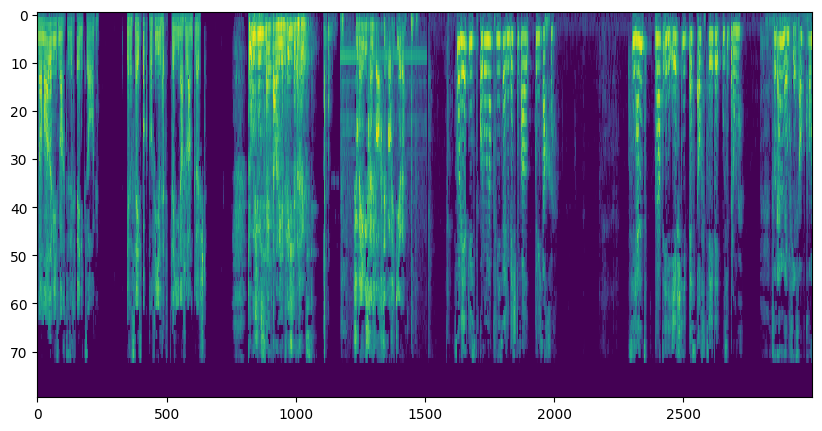

In [32]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel, aspect='auto', cmap='viridis', interpolation='nearest')


# Show the plot
plt.show()


In [33]:
example_mel_t = time_warping(example_mel)

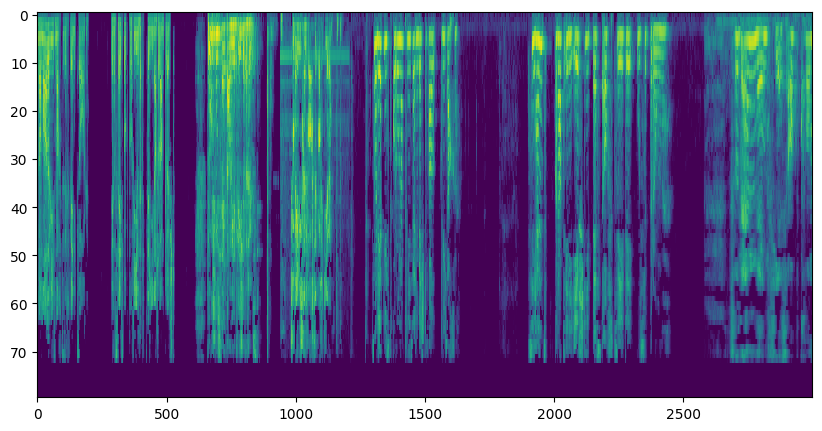

In [34]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 5))  # Width, height in inches

# Display the Mel spectrogram with a colormap and interpolation
plt.imshow(example_mel_t, aspect='auto', cmap='viridis', interpolation='nearest')
# Show the plot
plt.show()


In [35]:
inverse_example = inverse_mel_to_audio(example_mel_t)

In [36]:
ipd.Audio(inverse_example, rate=16000)